## Importing Dataset

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd


iris = datasets.load_iris()
X = iris.data[:, [2,3]] # will be considering 2 features just to simplify the plot, and it would be easier to understand decision tree as weell
y = iris.target

#np.unique(y)
#np.info(X)

## Splitting data

In [2]:
from sklearn.model_selection import train_test_split

X_, X_test, y_, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17, stratify=y)

# using X_ and y_ will make our train and validation set

X_train, X_val, y_train, y_val = train_test_split(
    X_, y_, test_size=0.2, random_state=17, stratify=y_)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)



(96, 2) (96,)
(24, 2) (24,)
(30, 2) (30,)


In [3]:
# because of stratification all class labels match the same distribution

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_val:', np.bincount(y_val))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [32 32 32]
Labels counts in y_val: [8 8 8]
Labels counts in y_test: [10 10 10]


## Model Building

In [4]:
#conda install -c conda-forge mlxtend 


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score



tree = DecisionTreeClassifier(criterion="entropy",
                              max_depth=3,
                              random_state=17)

tree.fit(X_train,y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

In [6]:
y_pred = tree.predict(X_train)

In [7]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      0.94      0.97        32
           2       0.94      1.00      0.97        32

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96



## HyperParameter Tuning

In [8]:
from sklearn.model_selection import GridSearchCV


tree_params = {'max_depth': list(range(1, 21)) + [30, 40, 50],
               'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50]}


In [9]:
# Using accuracy as the primary scoring metric for hyperparameter tuning

tuned_decision_tree = DecisionTreeClassifier(criterion="entropy",random_state=0)

scoring = ['accuracy', 'recall_macro', 'f1_macro', 'precision_macro']

clf = GridSearchCV(tuned_decision_tree,
                   tree_params,
                   scoring=scoring,
                   cv=5,
                   refit='f1_macro')

In [10]:
import warnings
warnings.filterwarnings('ignore')


# Fit the model to the training data
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1_macro',
             scoring=['accuracy', 'recall_macro', 'f1_macro',
                      'precision_macro'])

In [11]:
# Best model
best_tree = clf.best_estimator_
best_tree

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       random_state=0)

## Evaluate the model on the validation set for hyperparameter tuning


In [12]:
y_val_pred = best_tree.predict(X_val)
val_report = classification_report(y_val, y_val_pred, zero_division=0)
print("Validation Set Evaluation (for Hyperparameter Tuning):")
print(val_report)

Validation Set Evaluation (for Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.75      0.86         8
           2       0.80      1.00      0.89         8

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24



## Re-train the best model on the combined training and validation sets


In [13]:
best_tree.fit(np.vstack((X_train, X_val)), np.hstack((y_train, y_val)))

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       random_state=0)

## Evaluation

In [14]:
# Evaluation on the training set
y_train_pred = best_tree.predict(X_train)
train_report = classification_report(y_train, y_train_pred, zero_division=0)
print("Training Set Evaluation:")
print(train_report)

Training Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.97      1.00      0.98        32
           2       1.00      0.97      0.98        32

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96



In [15]:
# Evaluation on the test set
y_test_pred = best_tree.predict(X_test)
test_report = classification_report(y_test, y_test_pred, zero_division=0)
print("Test Set Evaluation:")
print(test_report)

Test Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Plotting the decision region

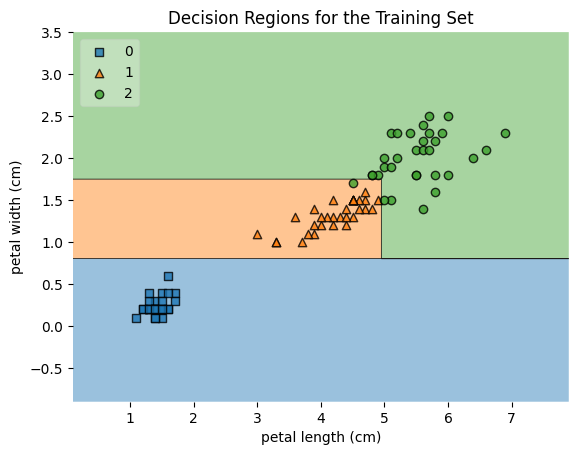

In [16]:
# Plot decision regions for the training set
plot_decision_regions(X_train, y_train, clf=best_tree, legend=2)
plt.title("Decision Regions for the Training Set")
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

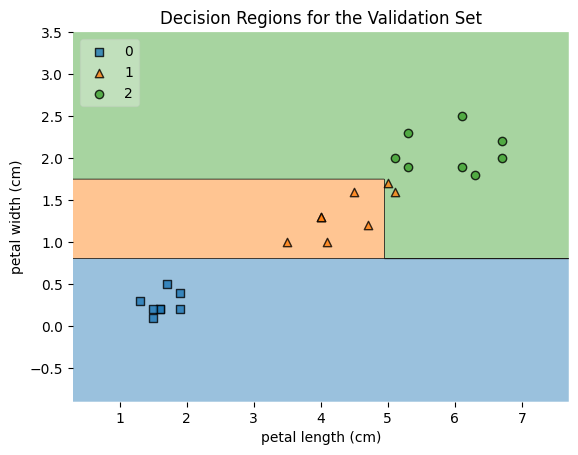

In [17]:
# Plot decision regions for the validation set
plot_decision_regions(X_val, y_val, clf=best_tree, legend=2)
plt.title("Decision Regions for the Validation Set")
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

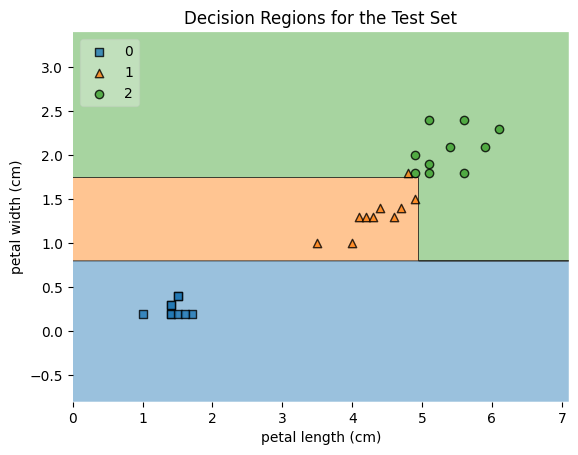

In [18]:
# Plot decision regions for the test set
plot_decision_regions(X_test, y_test, clf=best_tree, legend=2)
plt.title("Decision Regions for the Test Set")
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

## Visualizing Decision Tree
- two methods pydotplus and graphviz

In [19]:
from sklearn.tree import plot_tree

In [20]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 80,50

[Text(0.4, 0.875, 'x[1] <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[1] <= 1.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 4.95\nentropy = 0.503\nsamples = 45\nvalue = [0, 40, 5]'),
 Text(0.2, 0.125, 'entropy = 0.172\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.6, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

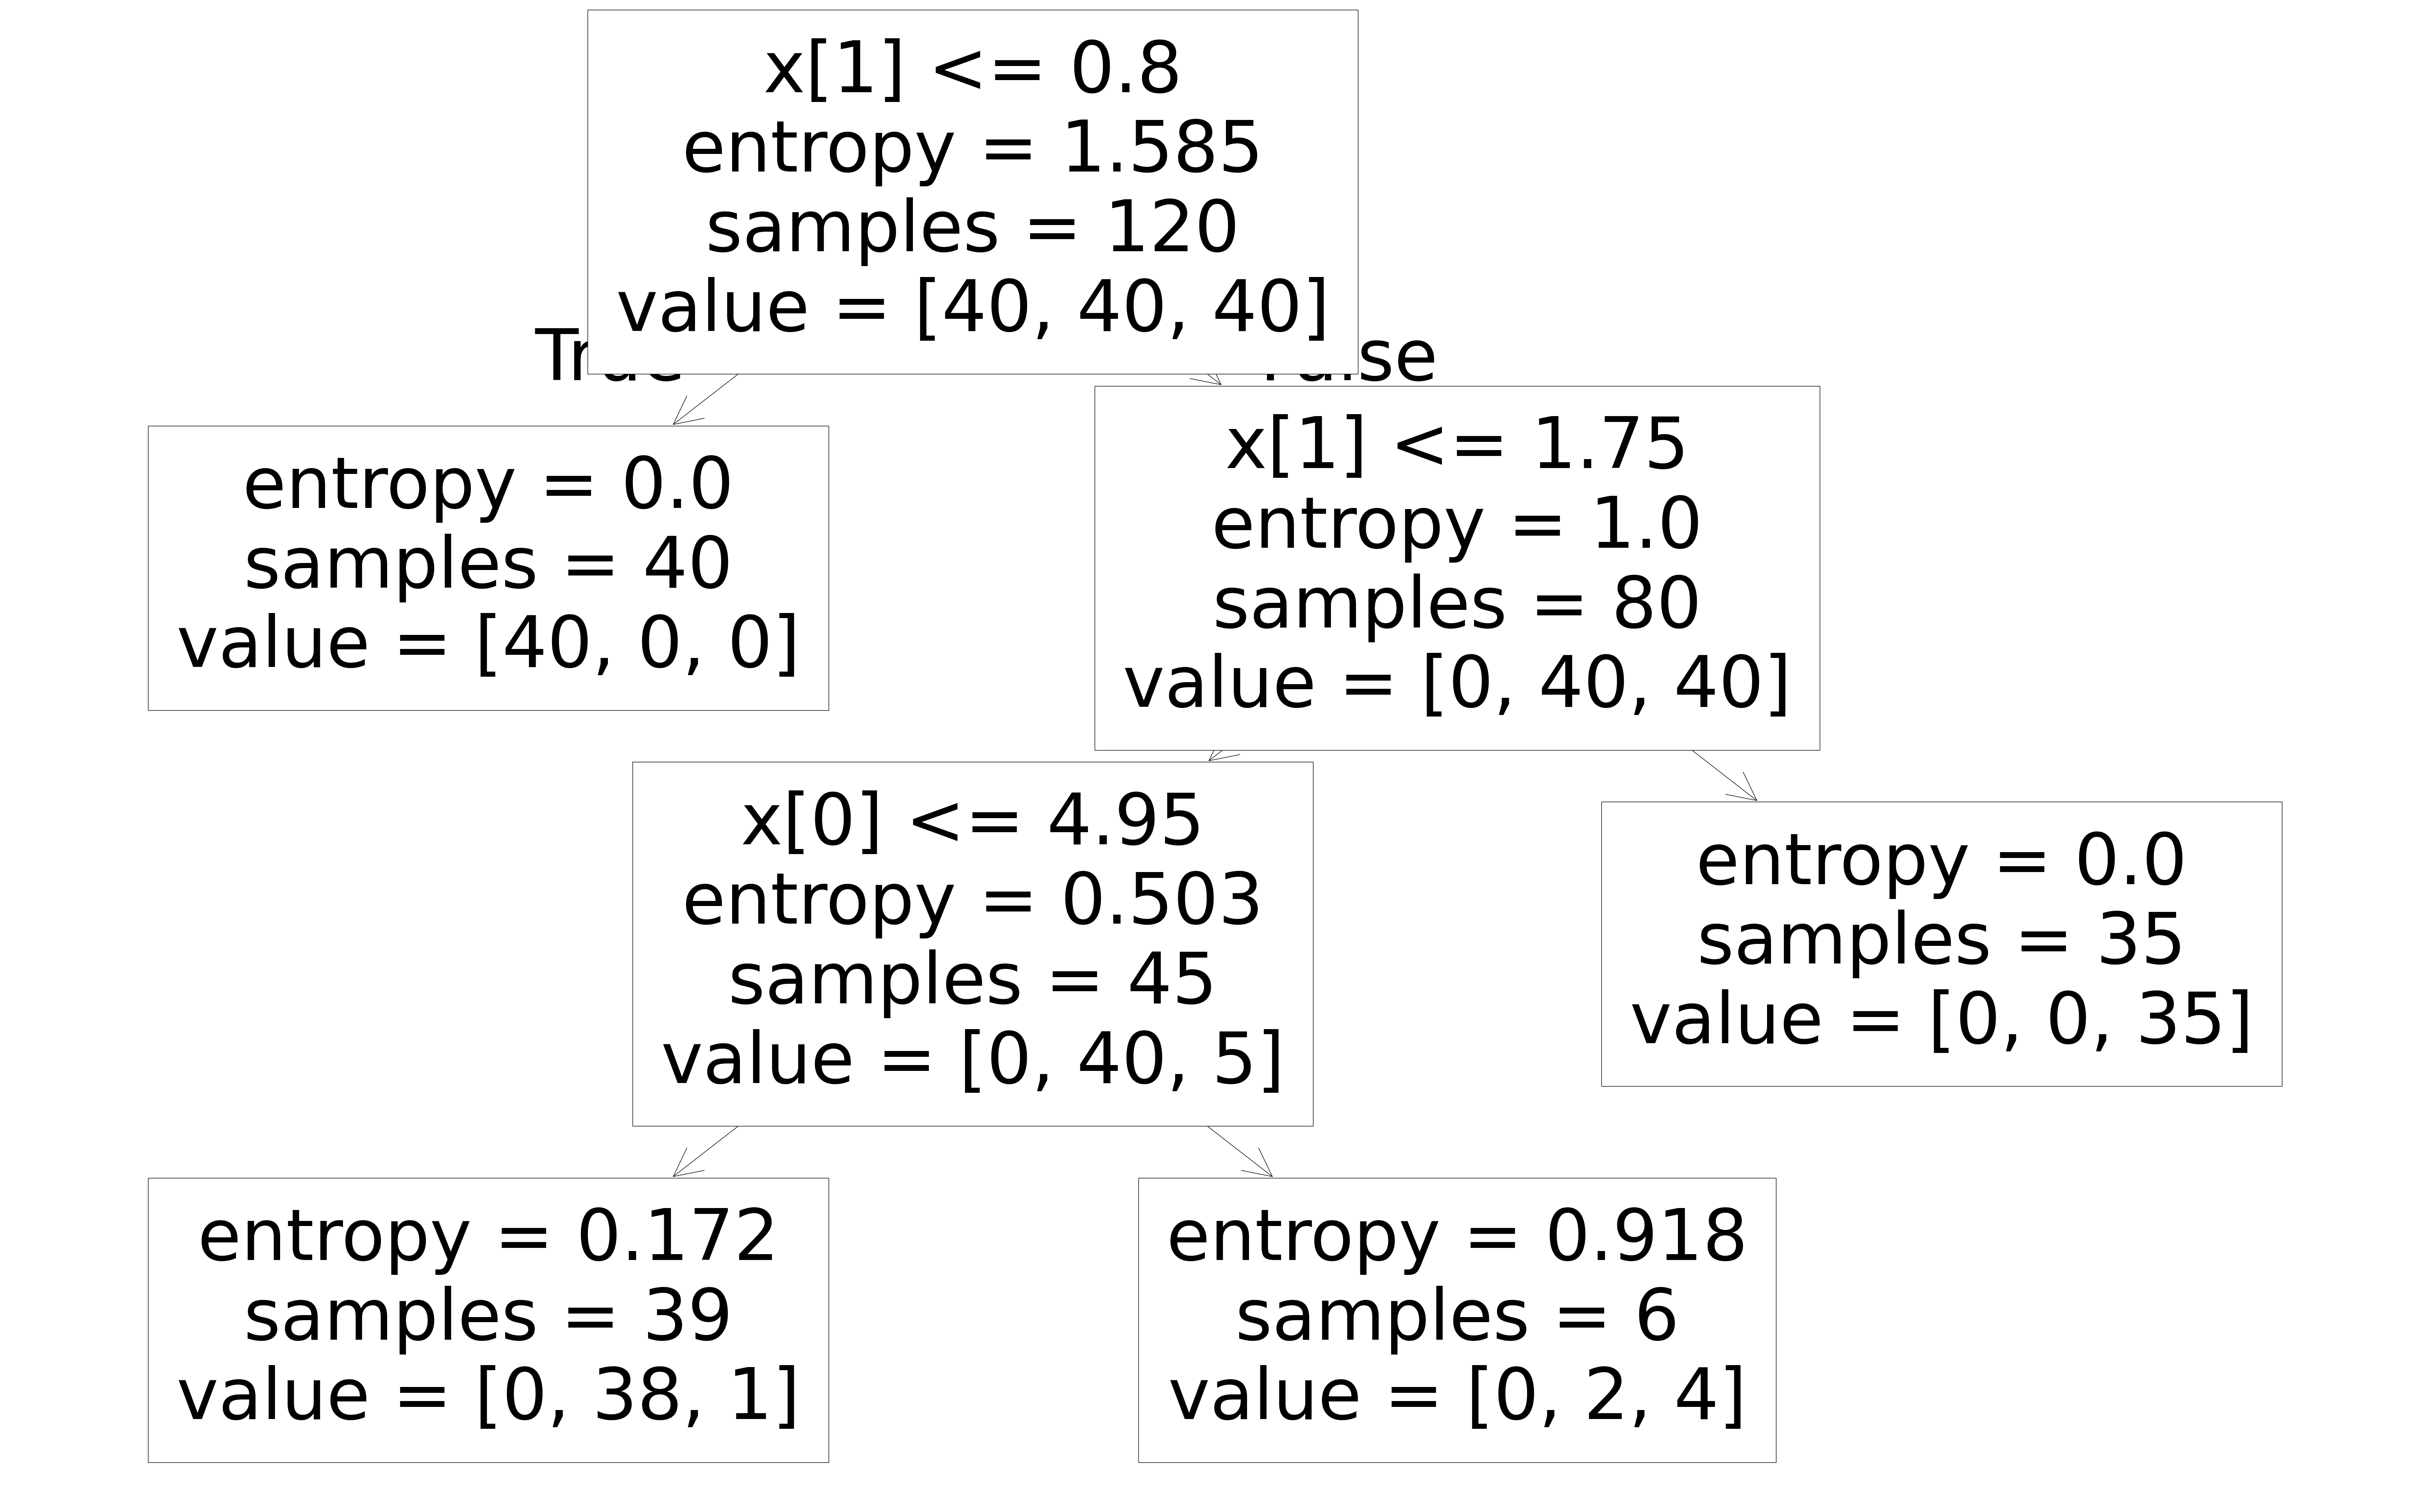

In [21]:
plot_tree(best_tree)

## Decision Tree Visualization

### Observation of the Decision Tree

- **Node 1**: `x[1] <= 0.8`
  - **Entropy**: 1.585
  - **Samples**: 120
  - **Class Distribution**: [40, 40, 40]

#### Left Child Node (True Condition)
- **Entropy**: 0.0
- **Samples**: 40
- **Class Distribution**: [40, 0, 0]
- **Description**: This node is a leaf node where all 40 samples are classified as class 0.

#### Right Child Node (False Condition)
- **Node 2**: `x[1] <= 1.75`
  - **Entropy**: 1.0
  - **Samples**: 80
  - **Class Distribution**: [0, 40, 40]

#### Left Child Node (True Condition)
- **Node 3**: `x[0] <= 4.95`
  - **Entropy**: 0.503
  - **Samples**: 45
  - **Class Distribution**: [0, 40, 5]

##### Left Child Node (True Condition)
- **Entropy**: 0.172
- **Samples**: 39
- **Class Distribution**: [0, 38, 1]

##### Right Child Node (False Condition)
- **Entropy**: 0.918
- **Samples**: 6
- **Class Distribution**: [0, 2, 4]

#### Right Child Node (False Condition)
- **Entropy**: 0.0
- **Samples**: 35
- **Class Distribution**: [0, 0, 35]
- **Description**: This node is a leaf node where all 35 samples are classified as class 2.

### Observation

- The first split was based on `x[1] <= 0.8`, which corresponds to petal length.
- The initial dataset had 120 samples with an entropy of 1.585.
- The values [40, 40, 40] represent the class distribution for the initial node.
- After the first split, the left child node had an entropy of 0, and all 40 points were classified as class 0, making it a leaf node.
- Further splits were performed on the right child node until all leaf nodes were achieved, ensuring the decision-making process continued until complete classification.



In [22]:
# from pydotplus import graph_from_dot_data
# from sklearn.tree import export_graphviz
# from IPython.display import Image

# # 'best_tree' is your trained decision tree model

# # Export the trained decision tree to DOT format
# dot_data = export_graphviz(best_tree,
#                            out_file=None,
#                            filled=True,
#                            feature_names=iris.feature_names[2:],  
#                            class_names=iris.target_names,
#                            rounded=True,  
#                            special_characters=True)  

# # Convert DOT data to a graphical format using pydotplus
# graph = graph_from_dot_data(dot_data)  
# graph.write_png('best_tree.png')

# # Display the image
# Image(graph.create_png())


In [23]:
# # Display the generated image
# from IPython.display import Image

# Image('best_tree.png')

In [24]:
#!pip install graphviz --quiet